# **CA06: Customer Segmentation using K-Means Clustering**

## Task 1

In [ ]:
#Importing the necessary libraries and loading the dataset into a dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Checking for missing values

df.isnull().sum()

#No missing values so nothing needs to be dropped

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

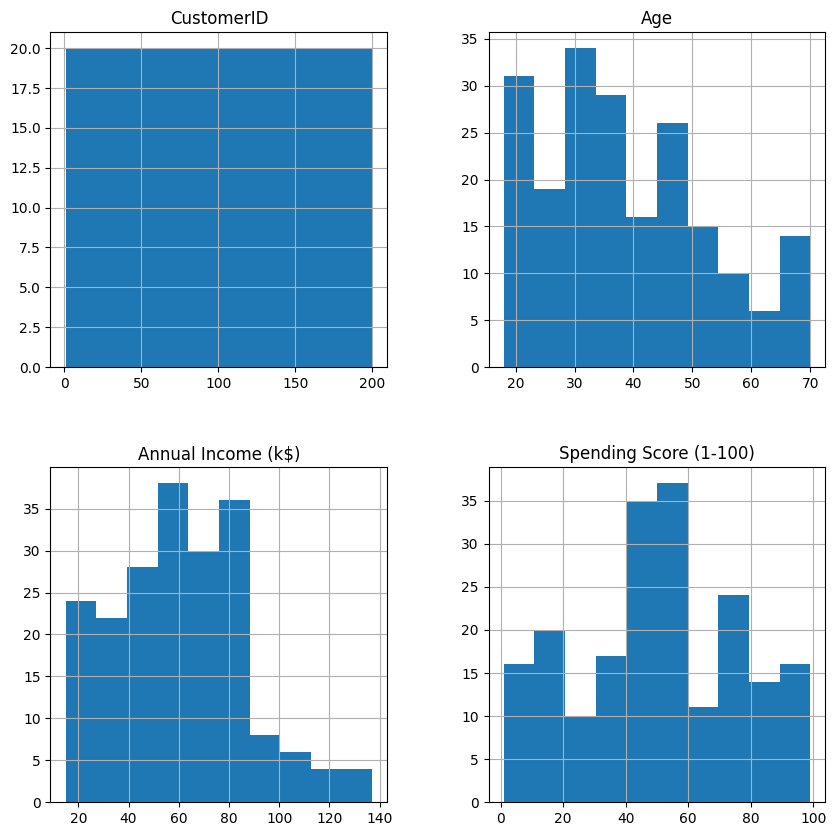

In [ ]:
#Visualizing the distribution of features with histograms

df.hist(figsize=(10,10))
plt.show()

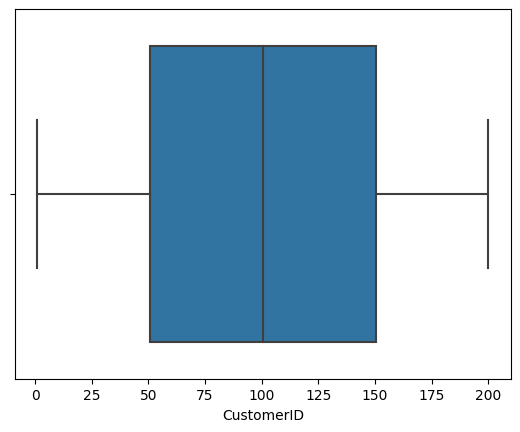

In [ ]:
#Visualizing the distribution of features with boxplots

sns.boxplot(x='CustomerID', data=df)
plt.show()

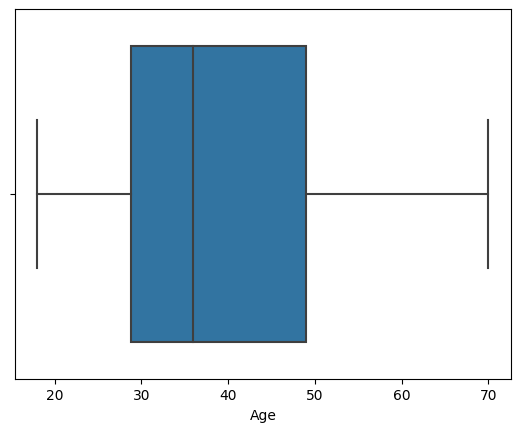

In [ ]:
sns.boxplot(x='Age', data=df)
plt.show()

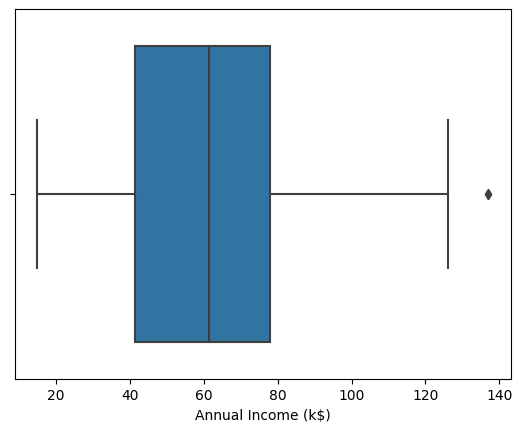

In [ ]:
sns.boxplot(x='Annual Income (k$)', data=df)
plt.show()

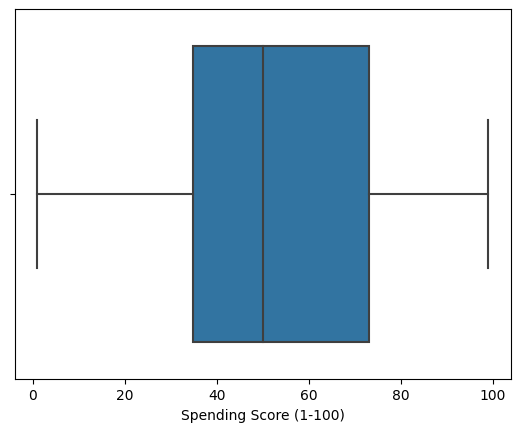

In [ ]:
sns.boxplot(x='Spending Score (1-100)', data=df)
plt.show()

# Task 2

In [ ]:
# Performing feature scaling to prepare the data for clustering

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df.iloc[:,2:])
df_scaler = pd.DataFrame(df_scaler, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df_scaler.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [ ]:
# Creating a new dataframe to choose features

ft = df.iloc[:, [3, 4]].values
df_features = pd.DataFrame(ft, columns=['Annual Income (thousands)', 'Spending Score 1-100'])
df_features.head()

,Annual Income (thousands),Spending Score 1-100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Task 3

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

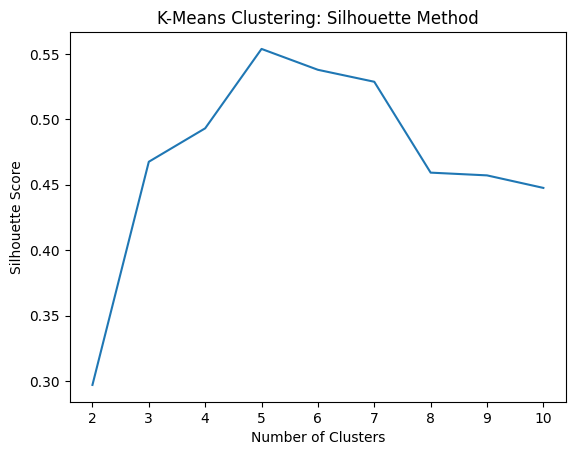

In [ ]:
# Importing KMeans algorithm and silhouette score metric

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

# Refining cluster amount

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(ft)
    silhouette_scores.append(silhouette_score(ft, kmeans.labels_))

# Visualizing the silhouette method

plt.plot(range(2, 11), silhouette_scores)
plt.title('K-Means Clustering: Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Training the KMeans model with the optimal number of clusters

kmeans = KMeans(n_clusters=5)
kmeans.fit(ft)
     

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
# Obtaining the cluster assignments for each data point

clusters = kmeans.predict(ft)
df_features['Cluster'] = clusters
df_features.head()

,Annual Income (thousands),Spending Score 1-100,Cluster
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


# Task 4

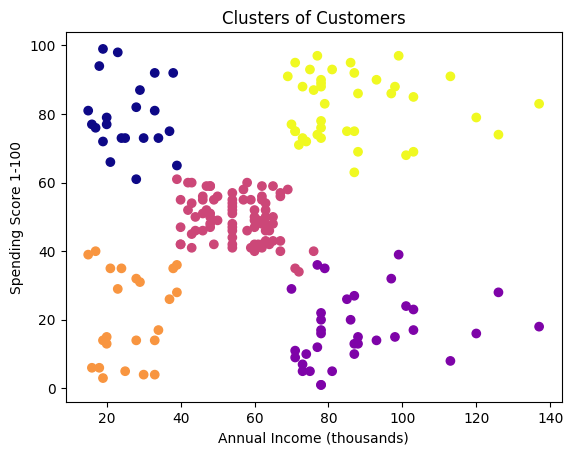

In [ ]:
# Creating a scatter plot of the selected features, colored by cluster assignment

plt.scatter(df_features['Annual Income (thousands)'], df_features['Spending Score 1-100'], c=df_features['Cluster'], cmap='plasma')
plt.xlabel('Annual Income (thousands)')
plt.ylabel('Spending Score 1-100')
plt.title('Clusters of Customers')
plt.show()

Interpretations for each cluster: 

Blue: Clients possessing a low to medium income level coupled with a moderate spending score, suggesting they maintain average spending habits with restricted spending capacity.

Yellow: Clients characterized by a low income and low spending score, suggesting they are conservative spenders with a limited ability to spend significantly.

Red: Clients with a moderate income and an elevated spending score, suggesting they exhibit moderate spending habits and show a willingness to spend more on shopping.

Orange: Clients who boast high income but have a low spending score, suggesting they are prudent spenders who prefer to save their money.

Purple: Clients with high income levels and high spending scores, suggesting they are lavish spenders with the financial capacity to spend more.





# Task 5

# a. Dataset and its Attributes
The Mall Customers dataset contains information about shoppers, such as their unique ID, age, income, and their spending score, which malls use to gauge how much customers spend.

# b. Steps For Data Preprocessing, Feature Selection, and Scaling
Preprocessing includes cleaning the data, such as removing NA or null values. Luckily there were none in this dataset so no preprocessing needed to be done. Next, feature selection helped determine how to  cluster, and Annual Income and Spending Score were the chosen features. Finally, scaling was done by first creating a new dataframe with only the mentioned features and then   using StandardScaler from the sci-kit learn, the data was standardized. 

# c. Determining the Optimal Number of Clusters
To determine the optimal number of clusters, the silhouette method was the chosen metric. The result was an optimal number of 5 clusters.

# d. Cluster Characteristics
Based on the K-means clustering algorithm, I obtained 5 clusters with the following characteristics:

Blue: Clients possessing a low to medium income level coupled with a moderate spending score, suggesting they maintain average spending habits with restricted spending capacity.

Yellow: Clients characterized by a low income and low spending score, suggesting they are conservative spenders with a limited ability to spend significantly.

Red: Clients with a moderate income and an elevated spending score, suggesting they exhibit moderate spending habits and show a willingness to spend more on shopping.

Orange: Clients who boast high income but have a low spending score, suggesting they are prudent spenders who prefer to save their money.

Purple: Clients with high income levels and high spending scores, suggesting they are lavish spenders with the financial capacity to spend more.

# e. Insights and Recommendations
As far of recommendations are concerned, I believe that the mall should tailor its marketing strategies based on customer segmentation analysis. By targeting specific customer segments, the mall can offer exclusive deals and discounts to high spenders. 

For the blue cluster, the mall can offer more affordable options and promotions to cater to their restricted spending capacity. They can also introduce loyalty programs that reward customers for their purchases to incentivize them to visit more often and increase their spending.

For the yellow cluster, the mall can focus on providing more affordable options and promotions to attract these conservative spenders. The mall can also offer financing options or installment plans for high-priced items to make them more accessible to customers in this segment.

For the red cluster, the mall can introduce new and exclusive products to attract these customers and keep them engaged. The mall can also provide personalized recommendations and offers based on their past purchases to increase their engagement and encourage them to spend more.

For the orange cluster, the mall can offer promotions and discounts on products that are likely to appeal to them. The mall can also improve its shopping experience by offering high-quality products and services that cater to this customer segment.

For the purple cluster, the mall can offer exclusive deals and discounts to these lavish spenders to encourage them to spend more. The mall can also introduce luxury products and services to cater to their preferences and keep them engaged. Additionally, the mall can offer personalized services such as personal shopping or private styling sessions to enhance their shopping experience.